Found 50154 images belonging to 2 classes.
Found 50154 images belonging to 2 classes.


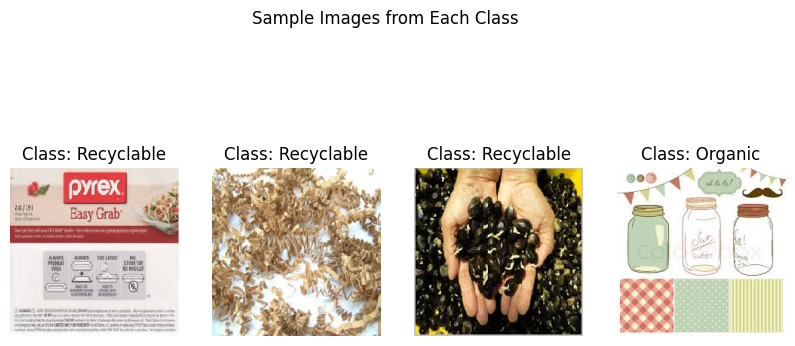

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths to the train and test directories
base_dir = r"/kaggle/input/waste-classification-data/DATASET"
train_dir = r"/kaggle/input/waste-classification-data/"
test_dir = r"/kaggle/input/waste-classification-data/"

# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):  # Display 4 images (2 from each class if available)
    image, label = next(train_data)  # Use next() to get a batch of images
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])  # Display the first image in the batch
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()


In [13]:
mobilenet_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), 
    include_top=False, 
    weights='/kaggle/input/dataset/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
)

model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Reduce (7, 7, 1280) -> (1280)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)

# The model learns over 5 epochs, seeing images in the training data, adjusting itself, and testing on new images.

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 772/1568 ━━━━━━━━━━━━━━━━━━━━ 50:14 4s/step - accuracy: 0.4943 - loss: 0.7361